## Setup 

In [2]:
import zipfile
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults
from statsmodels.tsa.stattools import acf
import itertools
import warnings
warnings.filterwarnings('ignore')

### TO DO: Replace the variable _spec_cpc_ with the list of patent classes you want to analyze

**Co-occurrence matrix with 20 classes ???????** <br>



Separate each CPC with a semicolon followed by a space <br>
To get the classification: search the patent on Google patent and at the classification. For the heavy metals: https://patents.google.com/patent/US20190046955A1/en?q=metal+organic+framework&inventor=daniel+sun <br>
* B01J20/226 Coordination polymers, e.g. metal-organic frameworks [MOF], zeolitic imidazolate frameworks [ZIF]
* B01J20/226 - Coordination polymers, e.g. metal-organic frameworks [MOF], zeolitic imidazolate frameworks [ZIF]


B - PERFORMING OPERATIONS; TRANSPORTING <br>
B01 - PHYSICAL OR CHEMICAL PROCESSES OR APPARATUS IN GENERAL <br>
B01J - CHEMICAL OR PHYSICAL PROCESSES, e.g. CATALYSIS OR COLLOID CHEMISTRY; THEIR RELEVANT APPARATUS<br>
B01J20/00 - Solid sorbent compositions or filter aid compositions; Sorbents for chromatography; Processes for preparing, regenerating or reactivating thereof <br>
B01J20/22 - Solid sorbent compositions or filter aid compositions; Sorbents for chromatography; Processes for preparing, regenerating or reactivating thereof comprising organic material <br>
B01J20/223 - Solid sorbent compositions or filter aid compositions; Sorbents for chromatography; Processes for preparing, regenerating or reactivating thereof comprising organic material containing metals, e.g. organo-metallic compounds, coordination complexes<br>
 B01J20/28033 Membrane, sheet, cloth, pad, lamellar or mat<br>
 C02F1/281 Treatment of water, waste water, or sewage by sorption using inorganic sorbents<br>
 C02F1/285 Treatment of water, waste water, or sewage by sorption using synthetic organic sorbents<br>
 C02F2101/20 Heavy metals or heavy metal compounds<br>
 
 
 https://www.cooperativepatentclassification.org/cpcSchemeAndDefinitions/table <br>
https://www.uspto.gov/web/patents/classification/cpc/html/cpc-C12N.html <br>
http://169.229.7.241/p.focused.laser <br> http://169.229.7.241/p.heavy.metals <br>http://169.229.7.241/p.rocket.fuels<br>http://169.229.7.241/p.weedbot
<br>
Look at the patent and see what CPC classes are there. 10-12 variables:

Right now, we use the number of patents by year. We can use as features: <br>
Download Links
1 http://169.229.7.241/prediction/cites.from.CPC.by.grantyear.tsv <br>
2 http://169.229.7.241/prediction/cites.into.CPC.by.grantyear.tsv<br>
3 http://169.229.7.241/prediction/cites.non-patent.literature.from.CPC.by.grantyear.tsv <br>
4 http://169.229.7.241/prediction/patent.application.counts.by.CPC.by.grantyear.tsv<br>
5 http://169.229.7.241/prediction/patent.counts.by.CPC.by.grantyear.tsv<br>
6 http://169.229.7.241/prediction/patent.counts.owned.by.Lone.Inventors.by.CPC.by.grantyear.tsv<br>
7 http://169.229.7.241/prediction/patent.counts.owned.by.Private.Sector.by.CPC.by.grantyear.tsv<br>
8 http://169.229.7.241/prediction/patent.counts.owned.by.Unique.Number.of.Assignees.by.CPC.by.grantyear.tsv<br>
9 http://169.229.7.241/prediction/patent.counts.owned.by.Universities.by.CPC.by.grantyear.tsv<br>
10 http://169.229.7.241/prediction/patent.counts.owned.by.US.Federal.Government.by.CPC.by.grantyear.tsv<br>
11 http://169.229.7.241/prediction/patent.counts.supported.by.US.Federal.Government.by.CPC.by.grantyear.tsv<br>



In [3]:
#list CPCs
#input_cpc = 'A61P 31/12; C12N 15/111; A61P 31/00; C12N 9/22; C12N 15/113; A61P 31/04; C12N 15/70; C12N 15/746; A01K 67/027; A61P 35/00; C12N 15/102; C12N 15/63; C12Q 1/686; A61P 43/00; C12N 15/90; A61K 38/465; A01H 6/4684; C12N 15/907; C12N 15/902; C12N 2310/531; C12N 2310/14; C12N 2310/33; C12N 2310/32; C12N 2310/11; A61K 48/00; C12Y 301/04; C12N 2310/20; C12N 2310/3519; C12N 2310/13; C12N 2800/80; C12N 2310/31; C12N 9/96; C12N 15/111; C12N 15/85; C12Q 1/68; C12N 9/22; C12N 15/902; C12N 15/63; C12N 15/907; C12N 15/102; C12N 15/1082; C12N 9/14; A61K 38/43; C12N 2800/90; C12N 9/52; C12N 15/00; A61K 38/46; A61K 38/47; C12N 2310/10; C12N 2800/30; C12N 2310/20; C12N 2800/80'
#input_cpc= 'H01S 3/1307; G02B 27/1086; H01S 3/067; H01S 3/2383; G02B 5/1861; G02B 27/1086'

#list CPCs
#input_cpc = 'A61P 31/12; C12N 15/111; A61P 31/00; C12N 9/22; C12N 15/113; A61P 31/04; C12N 15/70; C12N 15/746; A01K 67/027; A61P 35/00; C12N 15/102; C12N 15/63; C12Q 1/686; A61P 43/00; C12N 15/90; A61K 38/465; A01H 6/4684; C12N 15/907; C12N 15/902; C12N 2310/531; C12N 2310/14; C12N 2310/33; C12N 2310/32; C12N 2310/11; A61K 48/00; C12Y 301/04; C12N 2310/20; C12N 2310/3519; C12N 2310/13; C12N 2800/80; C12N 2310/31; C12N 9/96; C12N 15/111; C12N 15/85; C12Q 1/68; C12N 9/22; C12N 15/902; C12N 15/63; C12N 15/907; C12N 15/102; C12N 15/1082; C12N 9/14; A61K 38/43; C12N 2800/90; C12N 9/52; C12N 15/00; A61K 38/46; A61K 38/47; C12N 2310/10; C12N 2800/30; C12N 2310/20; C12N 2800/80'

#input_cpc = 'C02F 1/00; C02F 3/00; B01J 20/226; B01J 20/00; B01J 20/22; B01J 20/223; B01J 20/28033; B01J 20/265; C02F 1/281; C02F 1/285; C02F 2101/20; G01N 33/497; Y02C 10/08; B01D 69/148; B01J 20/262; B01J 20/263; B01J 20/264; A61L 15/26'

input_cpc = 'B01J 20/28042; B01J 31/2239; C07C 51/418; B01J 20/18; B01J 20/20; B01J 20/226; B01D 2253/204; B01D 53/02; C07F 3/003; Y10T 436/204998; F17C 11/005; B01J 20/30; B01J 2531/26; B01J 31/1691; C07F 3; B01D 2253/204; Y10T 436/25875; Y10T 436/11; G01N 27/125; G01N 33/004'


### Functions

In [4]:
#plot cpc, rolling mean, rolling standard deviation
#print Dickey–Fuller test
def plot_cpc(df, title, window = 5, adf = False):
    r_mean = df.rolling(window = window).mean()
    r_std = df.rolling(window = window).std()

    plt.plot(df, label = 'Original')
    plt.plot(r_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(r_std, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.xlabel('Year')
    plt.ylabel('Number of Patents')
    plt.title(title)
    plt.show()
    
    if adf:
        result = adfuller(df['Num_of_Patents'])
        print('ADF Statistic: {}'.format(result[0]))
        print('p-value: {}'.format(result[1]))
        #print('Critical Values:')
        #for key, value in result[4].items():
            #print('\t{}: {}'.format(key, value))
            
            
#plot first and second order differencing
def plot_diff(data, title):
    #plot data, rolling mean, rolling standard dev
    plot_cpc(data, title, adf = True)

    #subtracting rolling mean
    r_mean = data.rolling(window=5).mean()
    r_diff = data - r_mean
    r_diff.dropna(inplace=True)
    plot_cpc(r_diff, '{} Subtracting Rolling Mean (Window=5)'.format(title), adf = True)

    #time shifting - first order differencing
    #same as using .diff(periods=1)
    df_shift = data - data.diff()
    df_shift.dropna(inplace=True)
    plot_cpc(df_shift, '{} First Order Differencing (Period = 1)'.format(title), adf = True)

    #second order differencing
    df_shift2 = data.diff().diff()
    df_shift2.dropna(inplace=True)
    plot_cpc(df_shift2, '{} Second Order Differencing (Period = 1)'.format(title), adf = True)


#best p, d, q parameters for ARIMA
#p=5 since we want to use five previous years
def best_pdq(vals, p=5, d=None, exog=None):
    
    params = []
    if p is None:
        p = [4, 5]
    else:
        p = [p]
        
    if d is None:
        d = [0, 1, 2, 3, 4] #######CAN BE INCREASED

    else:
        d = [d]
                
    for pdq in itertools.product(p, d, [1,2,3,4,5]):
        params.append(pdq)

    #TO DO: change metric measurement
    #The AIC can only be used to compare models with the same d
    best_params = params[0]
    best_aic = 500
    for i in params:
        try:
            model = ARIMA(vals, order=i, exog=exog)
            model_fit = model.fit(disp=0)
            if model_fit.aic < best_aic:
                best_params = i
                best_aic = model_fit.aic
        except:
            pass
        
    return best_params


#accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE, mean absolute percentage error
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

#build ARIMA and show results
def model_arima(data, year=1, p=5, d=None, metrics=False, ret = False):
    
    # Create Training and Test
    n = len(data)
    train = data[:n-year]
    test = data[n-year:]

    train_pdq = best_pdq(train, p=p, d=d)
    
    #modeling
    model = ARIMA(train, order=train_pdq)
    fitted = model.fit(disp=-1)
    
    if not ret:
        print(fitted.summary())

    fc, se, conf = fitted.forecast(len(test), alpha=0.05)  # 95% conf
    
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    
    if not ret:
        plt.figure(figsize=(10,4))
        plt.plot(train, label='training')
        plt.plot(test, 'o', label='actual')
        plt.plot(fc_series, '^', label='forecast')
        plt.fill_between(lower_series.index, lower_series, upper_series, 
                         color='k', alpha=.15)
        plt.title('Forecast vs Actuals')
        plt.legend(loc='upper left', fontsize=8)
    
        plt.show()

        print('Actual: {} patents'.format(test.values[0][0]))
        print('Forecast: {} patents'.format(fc_series.values[0]))
    
    #print accuracy metrics
    if metrics:
        accuracy = forecast_accuracy(fc, test['Num_of_Patents'].values)
        print('\nMAPE: {}'.format(accuracy['mape']))
    
    if ret:
        return test.values[0][0], fc_series.values[0]
    

## Data Processing

In [33]:

#data_zip = 'Data.zip'
#data_file = 'cpc.num_patents.by.year.txt'

#zf = zipfile.ZipFile(data_zip) 
#data = pd.read_csv(zf.open(data_file), sep="\t")

from functools import reduce

data_file = 'cpc.num_patents.by.year.txt'

file1 = 'patent.counts.by.CPC.by.grantyear.tsv'
file2 = 'patent.application.counts.by.CPC.by.grantyear.tsv'
file3 = 'patent.counts.owned.by.Private.Sector.by.CPC.by.grantyear.tsv'
file4 = 'patent.counts.owned.by.US.Federal.Government.by.CPC.by.grantyear.tsv'
file5 = 'patent.counts.owned.by.Universities.by.CPC.by.grantyear.tsv'
file6 = 'patent.counts.owned.by.Lone.Inventors.by.CPC.by.grantyear.tsv'
file7 = 'patent.counts.owned.by.Unique.Number.of.Assignees.by.CPC.by.grantyear.tsv'
file8 = 'patent.counts.supported.by.US.Federal.Government.by.CPC.by.grantyear.tsv'
file9 = 'cites.into.CPC.by.grantyear.tsv'
file10 = 'cites.from.CPC.by.grantyear.tsv'
file11 = 'cites.non-patent.literature.from.CPC.by.grantyear.tsv'

pat_counts = pd.read_csv(file1, sep="\t").set_index(['CPC','year_'])
app_counts = pd.read_csv(file2, sep="\t").set_index(['CPC','year_'])
priv_counts = pd.read_csv(file3, sep="\t").set_index(['CPC','year_'])
gov_counts = pd.read_csv(file4, sep="\t").set_index(['CPC','year_'])
univ_counts = pd.read_csv(file5, sep="\t").set_index(['CPC','year_'])
invent_counts = pd.read_csv(file6, sep="\t").set_index(['CPC','year_'])
assign_counts = pd.read_csv(file7, sep="\t").set_index(['CPC','year_'])
govsup_counts = pd.read_csv(file8, sep="\t").set_index(['CPC','year_'])
citesinto_counts = pd.read_csv(file9, sep="\t").set_index(['CPC','year_'])
citesfrom_counts = pd.read_csv(file10, sep="\t").set_index(['CPC','year_'])
citeslit_counts = pd.read_csv(file11, sep="\t").set_index(['CPC','year_'])

data_list = [pat_counts, app_counts, priv_counts, gov_counts, univ_counts, invent_counts, assign_counts, govsup_counts,
             citesinto_counts, citesfrom_counts, citeslit_counts]

#Putting in the same df
data = reduce(lambda x, y: pd.merge(x, y, how='outer', left_index=True, right_index=True), data_list)
data.columns = ['patents', 'applications', 'private', 'government', 'university', 'inventor', 
                    'assignee', 'gov_support', 'cites_into', 'cites_from', 'cites_literature']

data = data.reset_index()

data = data.fillna(0)

data = data.rename(columns = {'year_' : 'Year'})
data.head()
#data = pd.read_csv(data_file, sep="\t")

#data.head()

,CPC,Year,patents,applications,private,government,university,inventor,assignee,gov_support,cites_into,cites_from,cites_literature
0,A01B 1,2000,10.0,0.0,0.0,0.0,0.0,10.0,0.0,10.0,43.0,206.0,5.0
1,A01B 1,2001,5.0,1.0,2.0,0.0,0.0,3.0,2.0,5.0,31.0,62.0,0.0
2,A01B 1,2002,10.0,9.0,4.0,0.0,0.0,6.0,4.0,10.0,27.0,157.0,0.0
3,A01B 1,2003,4.0,9.0,3.0,0.0,0.0,1.0,3.0,4.0,44.0,78.0,0.0
4,A01B 1,2004,1.0,7.0,0.0,0.0,0.0,1.0,0.0,1.0,38.0,4.0,0.0


In [6]:
#data.query('CPC_Patent_Class == "H01S 3/067"')
#plot_cpc(cpc_dict["H01S 3/067"], 'Test')

In [27]:
#cit_file = 'ALL.CPC.forward.citation.grouped.by.CPC.by.year.txt'
cit_file = file9
cit = pd.read_csv(cit_file, sep="\t")
cit = cit.rename(columns={'CPC': 'CPC', 'year_': 'Year', 'cites_into_CPC': 'Num_of_Citations'})
cit.head()

,CPC,Year,Num_of_Citations
0,A01B 1,2000,43
1,A01B 1,2001,31
2,A01B 1,2002,27
3,A01B 1,2003,44
4,A01B 1,2004,38


In [28]:
#list of CPCs
spec_cpc = input_cpc.split('; ')

In [29]:
#data for Heavy Metal CPCs
data_spec = data[data['CPC'].isin(spec_cpc)]
cit_spec = cit[cit['CPC'].isin(spec_cpc)]

#number of years of data for each CRISPR CPC
amt_data = data_spec[['CPC', 'patents']].groupby(['CPC'], as_index=False).count().sort_values(['patents'], ascending=False)
amt_data

,CPC,patents
0,B01D 2253/204,20
10,C07C 51/418,20
17,Y10T 436/204998,20
16,Y10T 436/11,20
15,G01N 33/004,20
14,G01N 27/125,20
13,F17C 11/005,20
12,C07F 3/003,20
11,C07F 3,20
9,B01J 31/2239,20


In [34]:
data_timeseries = data.pivot(index='Year', columns='CPC', values='patents')
cit_timeseries = cit.pivot(index='Year', columns='CPC', values='Num_of_Citations')

#cit_timeseries['H01S 3/2383'].dropna()

In [11]:
#convert the CRISPR CPC data into a dictionary of timeseries

# cpc_timeseries = []
# cpcs_avail = set(data_spec['CPC_Patent_Class'])
# for cpc in cpcs_avail:
#     yr_pt = ['Year', 'Num_of_Patents']
#     cpc_timeseries.append(data_spec[data_spec['CPC_Patent_Class'] == cpc][yr_pt].set_index('Year'))
    
# cpc_dict = dict(zip(cpcs_avail,cpc_timeseries))

# cit_timeseries = []
# cits_avail = set(cit_spec['CPC_Patent_Class'])
# for cit in cits_avail:
#     yr_cit = ['Year', 'Num_of_Citations']
#     cit_timeseries.append(cit_spec[cit_spec['CPC_Patent_Class'] == cit][yr_cit].set_index('Year'))
    
# cit_dict = dict(zip(cits_avail,cit_timeseries))

## ARIMA Model

ARIMA is an autoregressive moving average model with parameters p, d, q.

#### Auto regressive (AR) model:

$Y_t$ depends only on its own lags

$Y_t = \alpha + \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + \beta_3 Y_{t-3} + ... + \beta_p Y_{t-p} + \epsilon_1$

Represented by the parameter p: number of autoregressive terms, meaning the number of lags of Y to be used as predictors

#### Moving Average (MA) model (exponential smoothing):

$Y_t$ depends only on the lagged forecast errors

$Y_t = \alpha + \epsilon_t + \phi_1 \epsilon_{t-1} + \phi_2 \epsilon_{t-2} + ... + \phi_q \epsilon_{t-q}$

The error terms are the errors of the AR models of the respective lags.
Represented by parameter  q: number of moving-average terms, meaning the number of lagged forecast errors that should go into the ARIMA Model

#### ARIMA becomes

$Y_t = \alpha + \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + \beta_3 Y_{t-3} + ... + \beta_p Y_{t-p}\epsilon_t + \phi_1 \epsilon_{t-1} + \phi_2 \epsilon_{t-2} + ... + \phi_q \epsilon_{t-q}$

### Resources: 
    
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

https://people.duke.edu/~rnau/411arim.htm#arima100

ARIMAX

http://barnesanalytics.com/analyzing-multivariate-time-series-using-arimax-in-python-with-statsmodels

### Basic ARIMA on all CPCs with > 5 years' worth of data

In [12]:
#all CPCs with >10 years
cpcs_10 = list(amt_data[amt_data['Num_of_Patents']>10]['CPC_Patent_Class'])

#all CPCs with >5 years
cpcs_5 = list(amt_data[amt_data['Num_of_Patents']>5]['CPC_Patent_Class'])

In [13]:
cpc_list = []
actual_list = []
forecast_list = []
cpc_failed = []

for cpc in cpcs_5:
    try:
        cpc_ts = data_timeseries[[cpc]].dropna()
        actual, forecast = model_arima(cpc_ts, ret=True)
        actual_list.append(actual)
        forecast_list.append(forecast)
        cpc_list.append(cpc)

    except:
        cpc_failed.append(cpc)
        pass
    
result_arima = pd.DataFrame(list(zip(actual_list, forecast_list)), index = cpc_list, columns =['Actual', 'Forecast'])
result_arima['% Error'] = abs(result_arima['Forecast'] - result_arima['Actual']) / result_arima['Actual']
result_arima.sort_values(['% Error'], ascending=False)

,Actual,Forecast,% Error
Y10T 436/25875,4.0,9.945167,1.486292
C07C 51/418,3.0,7.442134,1.480711
B01J 20/30,7.0,15.133149,1.161878
Y10T 436/11,26.0,49.816223,0.916009
B01D 2253/204,36.0,63.297248,0.758257
Y10T 436/204998,5.0,8.650357,0.730071
C07F 3,5.0,1.783045,0.643391
B01J 2531/26,8.0,12.844828,0.605603
C07F 3/003,9.0,3.821028,0.575441
B01J 31/1691,21.0,11.948484,0.431025


In [14]:
cpc_failed

['G01N 27/125', 'B01J 20/226']

In [15]:
print("Mean Error: {}".format(round(np.mean(result_arima['% Error']), 2)))
print("Range of Error: {} to {}".format(round(min(result_arima['% Error']), 2), round(max(result_arima['% Error']), 2)))
print("Variance of Error: {}".format(round(np.var(result_arima['% Error']), 2)))
print("Sum Error: {}".format(round(sum(result_arima['% Error']) + len(cpc_failed) * np.mean(result_arima['% Error']), 2)))

Mean Error: 0.58
Range of Error: 0.01 to 1.49
Variance of Error: 0.21
Sum Error: 11.06


### **Jace: what do we do for next week? Why are the graphs so slow?**

KeyboardInterrupt: 

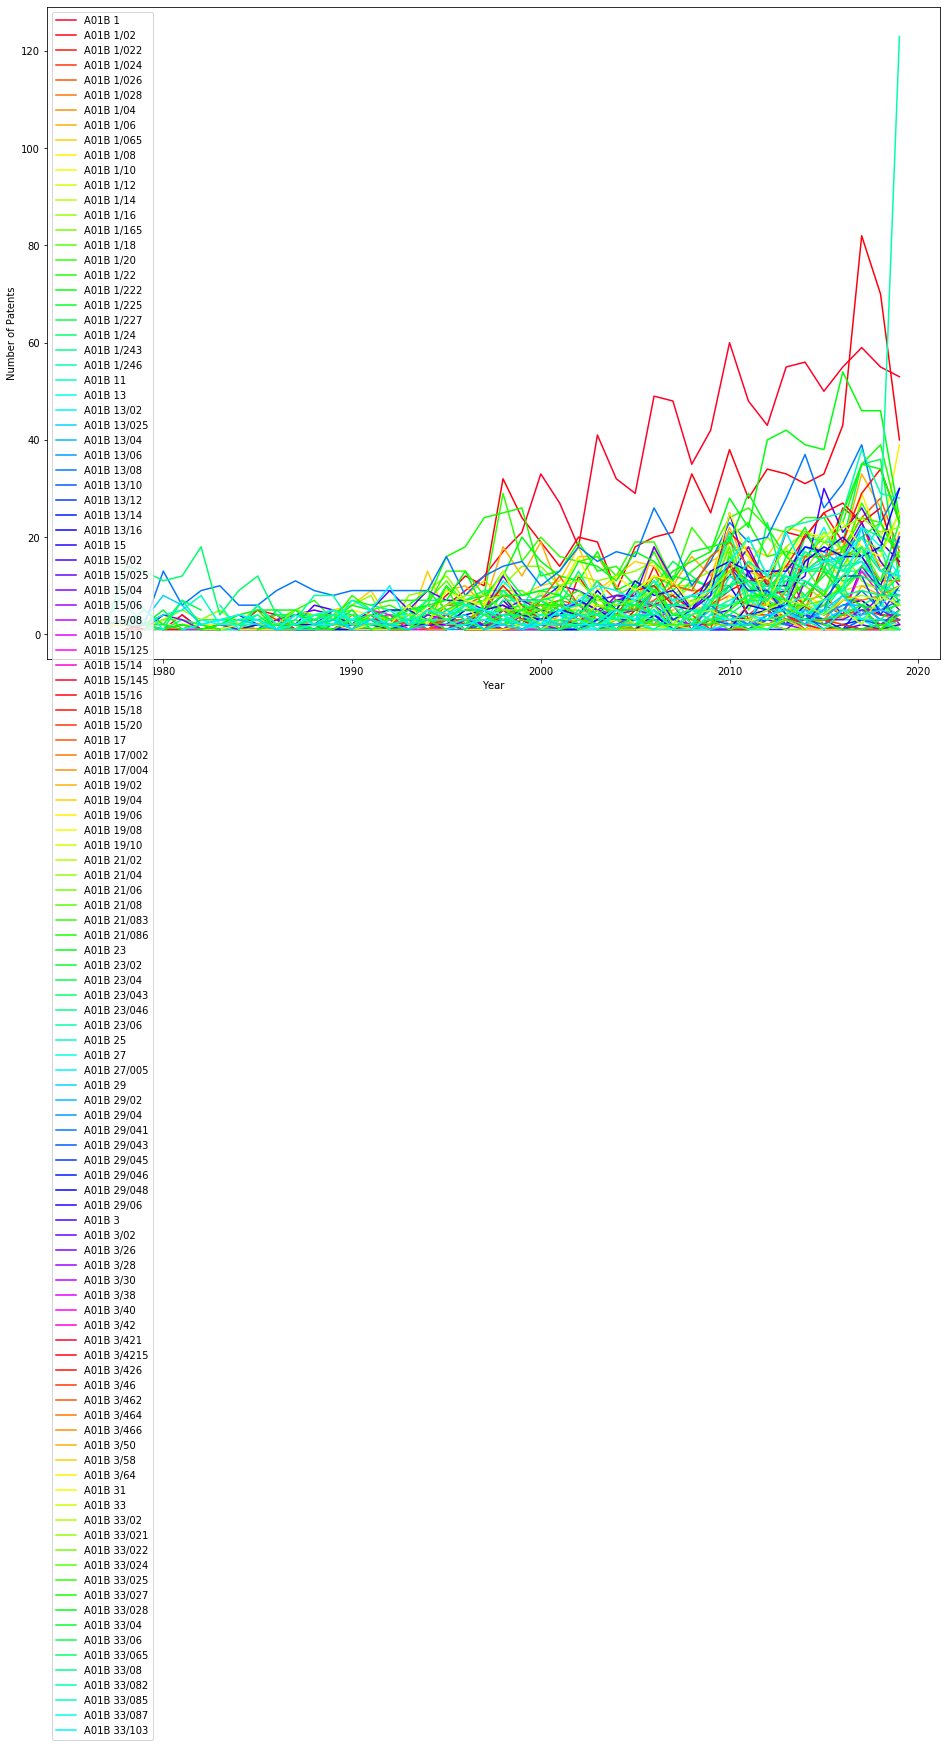

In [15]:
colors = len(cit_timeseries)
cm = plt.get_cmap('gist_rainbow')
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/colors) for i in range(colors)])

for cpc, timeseries in cit_timeseries.items():
    plt.plot(timeseries, label = cpc)
    plt.legend(loc = 'best')
    plt.xlabel('Year')
    plt.ylabel('Number of Patents')

plt.show()

## Correlation of different CPCs

In [16]:
#correlation matrix of the CPCs, exlcuding data from 2019
categ = pd.Series(spec_cpc).str[0:4]
cols = data_timeseries.columns[data_timeseries.columns.str[0:4].isin(categ)]
corr_data = data_timeseries[cols][:-1]
correlations = corr_data.corr()
#correlations.style.applymap(lambda x: 'background-color : yellow' if x > 0.95 and x < 1 else '')

In [17]:
correlations

CPC_Patent_Class,B01D 1,B01D 1/0005,B01D 1/0011,B01D 1/0017,B01D 1/0023,B01D 1/0029,B01D 1/0035,B01D 1/0041,B01D 1/0047,B01D 1/0052,...,Y10T70/413,Y10T70/415,Y10T70/417,Y10T70/437,Y10T70/491,Y10T83/7693,Y10T83/7697,Y10T83/7755,Y10T83/9319,Y10T83/97
CPC_Patent_Class,,,,,,,,,,,,,,,,,,,,,
B01D 1,1.000000,-0.088575,0.798334,-0.282507,-0.570352,0.347727,0.730784,0.668301,0.397396,-0.172062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B01D 1/0005,-0.088575,1.000000,0.589208,-0.078152,-1.000000,0.250000,0.238513,0.396059,0.562500,-0.295804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B01D 1/0011,0.798334,0.589208,1.000000,-0.111132,-0.440225,0.912245,0.689491,0.832776,0.519589,-0.204598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B01D 1/0017,-0.282507,-0.078152,-0.111132,1.000000,0.000000,0.091287,-0.316411,-0.078567,-0.376425,0.084141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B01D 1/0023,-0.570352,-1.000000,-0.440225,0.000000,1.000000,NaN,-1.000000,1.000000,NaN,-0.577350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y10T83/7693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y10T83/7697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y10T83/7755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Improving prediction using citation data and correlated CPCs


In [18]:
#given a CPC, build ARIMA using the citation data of the CPC and the top 5 most correlated CPCs (as endogenous variables)
def arima_corr(cpc_id, corr_cpc=5):
    
    corr_cpc = np.abs(correlations[cpc_id]).nlargest(corr_cpc+1).index.tolist()
        
    joined = pd.concat([data_timeseries[[i]] for i in corr_cpc] + [cit_timeseries[corr_cpc[0]]], axis=1).fillna(0)
    joined.columns = corr_cpc + ['Citation'] + ['']

    vals = joined[joined.columns.tolist()[0]]
    vals_exog = joined[joined.columns.tolist()[1:]]

    n = len(joined)
    year = 1
    train = vals[1:n-year] 
    train_exog = vals_exog[:n-year-1] #offset by one year
    test = vals[n-year:]
    test_exog = vals_exog[n-year-1:n-year]

    best_param = best_pdq(vals, p=5, exog=vals_exog)

    model = ARIMA(vals, order=best_param, exog=vals_exog)
    model_fit = model.fit(disp=0)

    fc, se, conf = model_fit.forecast(len(test), exog=test_exog , alpha=0.05)  # 95% conf

    fc_series = pd.Series(fc, index=test.index)

    return best_param, test.values[0], round(fc_series.values[0],2)


### Using CPC citation data

In [50]:
cpc_list_cit = []
actual_list_cit = []
forecast_list_cit = []
param_list_cit = []
cpc_failed_cit = []

for cpc in cpcs_5:
    try:
        param,actual,forecast = arima_corr(cpc, corr_cpc=0)
        actual_list_cit.append(actual)
        forecast_list_cit.append(forecast)
        param_list_cit.append(param)
        cpc_list_cit.append(cpc)

    except:
        cpc_failed_cit.append(cpc)
        pass
        
result_cit = pd.DataFrame(list(zip(actual_list_cit, forecast_list_cit)), index = cpc_list_cit, columns =['Actual', 'Forecast'])
result_cit['% Error'] = abs(result_cit['Forecast'] - result_cit['Actual']) / result_cit['Actual']
#result_cit.sort_values(['% Error'], ascending=False)

In [51]:
cpc_list_cit

['B01D 53/02',
 'B01J 20/20',
 'C07F 3/003',
 'B01J 20/18',
 'Y10T 436/25875',
 'Y10T 436/204998',
 'Y10T 436/11',
 'B01J 2531/26',
 'B01J 31/2239',
 'B01J 20/28042',
 'G01N 33/004',
 'B01J 20/30',
 'C07C 51/418',
 'B01J 31/1691',
 'C07F 3',
 'G01N 27/125',
 'B01J 20/226',
 'B01D 2253/204']

In [52]:
cpc_failed_cit

['F17C 11/005']

In [22]:
print("Mean Error: {}".format(round(np.mean(result_cit['% Error']), 2)))
print("Range of Error: {} to {}".format(round(min(result_cit['% Error']), 2), round(max(result_cit['% Error']), 2)))
print("Variance of Error: {}".format(round(np.var(result_cit['% Error']), 2)))
print("Sum Error: {}".format(round(sum(result_cit['% Error']) + len(cpc_failed_cit) * np.mean(result_cit['% Error']), 2)))


Mean Error: inf
Range of Error: 0.02 to inf
Variance of Error: nan
Sum Error: inf


### Using CPC citation data and top 5 correlated CPCs

In [53]:
cpc_list_5 = []
actual_list_5 = []
forecast_list_5 = []
param_list_5 = []
cpc_failed_5 = []

#for all CPCs with >5 years' data
for cpc in cpcs_5:
    try:
        param,actual,forecast = arima_corr(cpc)
        actual_list_5.append(actual)
        forecast_list_5.append(forecast)
        param_list_5.append(param)
        cpc_list_5.append(cpc)

    except:
        cpc_failed_5.append(cpc)
        pass

result_corrcpc5 = pd.DataFrame(list(zip(actual_list_5, forecast_list_5)), index = cpc_list_5, columns =['Actual', 'Forecast'])
result_corrcpc5['% Error'] = abs(result_corrcpc5['Forecast'] - result_corrcpc5['Actual']) / result_corrcpc5['Actual']
#result_corrcpc5.sort_values(['% Error'], ascending=False)

In [54]:
cpc_failed_5

['B01J 20/20', 'F17C 11/005', 'Y10T 436/25875', 'B01J 31/2239']

In [55]:
print("Mean Error: {}".format(round(np.mean(result_corrcpc5['% Error']), 2)))
print("Range of Error: {} to {}".format(round(min(result_corrcpc5['% Error']), 2), round(max(result_corrcpc5['% Error']), 2)))
print("Variance of Error: {}".format(round(np.var(result_corrcpc5['% Error']), 2)))
print("Sum Error: {}".format(round(sum(result_corrcpc5['% Error']) + len(cpc_failed_5) * np.mean(result_corrcpc5['% Error']), 2)))


Mean Error: inf
Range of Error: 0.33 to inf
Variance of Error: nan
Sum Error: inf


### Using CPC citation data and top 3 correlated CPCs

In [56]:
cpc_list_3 = []
actual_list_3 = []
forecast_list_3 = []
param_list_3 = []
cpc_failed_3 = []

for cpc in cpcs_5:
    try:
        print(cpc)
        param,actual,forecast = arima_corr(cpc, corr_cpc=3)
        actual_list_3.append(actual)
        forecast_list_3.append(forecast)
        param_list_3.append(param)
        cpc_list_3.append(cpc)

    except:
        cpc_failed_3.append(cpc)
        pass

result_corrcpc3 = pd.DataFrame(list(zip(actual_list_3, forecast_list_3)), index = cpc_list_3, columns =['Actual', 'Forecast'])
result_corrcpc3['% Error'] = abs(result_corrcpc3['Forecast'] - result_corrcpc3['Actual']) / result_corrcpc3['Actual']
#result_corrcpc3.sort_values(['% Error'], ascending=False)

B01D 53/02
B01J 20/20
C07F 3/003
B01J 20/18
F17C 11/005
Y10T 436/25875
Y10T 436/204998
Y10T 436/11
B01J 2531/26
B01J 31/2239
B01J 20/28042
G01N 33/004
B01J 20/30
C07C 51/418
B01J 31/1691
C07F 3
G01N 27/125
B01J 20/226
B01D 2253/204


In [57]:
cpc_failed_3

['B01J 20/20', 'F17C 11/005', 'Y10T 436/25875', 'B01J 31/2239']

In [58]:
print("Mean Error: {}".format(round(np.mean(result_corrcpc3['% Error']), 2)))
print("Range of Error: {} to {}".format(round(min(result_corrcpc3['% Error']), 2), round(max(result_corrcpc3['% Error']), 2)))
print("Variance of Error: {}".format(round(np.var(result_corrcpc3['% Error']), 2)))
print("Sum Error: {}".format(round(sum(result_corrcpc3['% Error']) + len(cpc_failed_3) * np.mean(result_corrcpc3['% Error']), 2)))

Mean Error: inf
Range of Error: 0.19 to inf
Variance of Error: nan
Sum Error: inf


### Using CPC citation data and top 10 correlated CPCs

In [59]:
cpc_list_10 = []
actual_list_10 = []
forecast_list_10 = []
param_list_10 = []
cpc_failed_10 = []

for cpc in cpcs_5:
    try:
        param,actual,forecast = arima_corr(cpc, corr_cpc=10)
        actual_list_10.append(actual)
        forecast_list_10.append(forecast)
        param_list_10.append(param)
        cpc_list_10.append(cpc)

    except:
        cpc_failed_10.append(cpc)
        pass

result_corrcpc10 = pd.DataFrame(list(zip(actual_list_10, forecast_list_10)), index = cpc_list_10, columns =['Actual', 'Forecast'])
result_corrcpc10['% Error'] = abs(result_corrcpc10['Forecast'] - result_corrcpc10['Actual']) / result_corrcpc10['Actual']
#result_corrcpc10.sort_values(['% Error'], ascending=False)

In [60]:
cpc_failed_10

['B01J 20/20']

In [61]:
print("Mean Error: {}".format(round(np.mean(corr_result_10['% Error']), 2)))
print("Range of Error: {} to {}".format(round(min(corr_result_10['% Error']), 2), round(max(corr_result_10['% Error']), 2)))
print("Variance of Error: {}".format(round(np.var(corr_result_10['% Error']), 2)))
print("Sum Error: {}".format(round(sum(corr_result_10['% Error']) + len(cpc_failed_10) * np.mean(corr_result_10['% Error']), 2)))

NameError: name 'corr_result_10' is not defined

## Correlation of CPC Citations

In [62]:
#correlation matrix of the CPCs, exlcuding data from 2019
categ = pd.Series(spec_cpc).str[0:4]
cols = cit_timeseries.columns[cit_timeseries.columns.str[0:4].isin(categ)]
corr_cit = cit_timeseries[cols][:-1]
correlations_cit = corr_cit.corr()
#correlations.style.applymap(lambda x: 'background-color : yellow' if x > 0.95 and x < 1 else '')

In [63]:
def arima_corr_cit(cpc_id, corr_cit=3):
    
    corr_cit = abs(correlations_cit[cpc_id]).nlargest(corr_cit+1).index.tolist()

    joined = pd.concat([cpc_dict[corr_cit[0]]] + [cit_dict[i] for i in corr_cit] , axis=1).fillna(0)
    joined.columns = ['Patents'] + corr_cit

    vals = joined[joined.columns.tolist()[0]]
    vals_exog = joined[joined.columns.tolist()[1:]]

    n = len(joined)
    year = 1
    train = vals[1:n-year] 
    train_exog = vals_exog[:n-year-1] #offset by one year
    test = vals[n-year:]
    test_exog = vals_exog[n-year-1:n-year]

    best_param = best_pdq(vals, p=5, exog=vals_exog)

    model = ARIMA(vals, order=best_param, exog=vals_exog)
    model_fit = model.fit(disp=0)

    fc, se, conf = model_fit.forecast(len(test), exog=test_exog , alpha=0.05)  # 95% conf

    fc_series = pd.Series(fc, index=test.index)

    return best_param, test.values[0], round(fc_series.values[0],2)


### Using CPC citation data and top 3 correlated citations

In [64]:
cpc_list_cit_3 = []
actual_list_cit_3 = []
forecast_list_cit_3 = []
param_list_cit_3 = []
cpc_failed_cit_3 = []

for cpc in cpcs_5:
    try:
        param,actual,forecast = arima_corr_cit(cpc)
        actual_list_cit_3.append(actual)
        forecast_list_cit_3.append(forecast)
        param_list_cit_3.append(param)
        cpc_list_cit_3.append(cpc)

    except:
        cpc_failed_cit_3.append(cpc)
        pass

result_corrcit3 = pd.DataFrame(list(zip(actual_list_cit_3, forecast_list_cit_3)), index = cpc_list_cit_3, columns =['Actual', 'Forecast'])
result_corrcit3['% Error'] = abs(result_corrcit3['Forecast'] - result_corrcit3['Actual']) / result_corrcit3['Actual']
result_corrcit3.sort_values(['% Error'], ascending=False)

,Actual,Forecast,% Error


In [65]:
cpc_failed_cit_3

['B01D 53/02',
 'B01J 20/20',
 'C07F 3/003',
 'B01J 20/18',
 'F17C 11/005',
 'Y10T 436/25875',
 'Y10T 436/204998',
 'Y10T 436/11',
 'B01J 2531/26',
 'B01J 31/2239',
 'B01J 20/28042',
 'G01N 33/004',
 'B01J 20/30',
 'C07C 51/418',
 'B01J 31/1691',
 'C07F 3',
 'G01N 27/125',
 'B01J 20/226',
 'B01D 2253/204']

In [66]:
# print("Mean Error: {}".format(round(np.mean(corr_result_cit_3['% Error']), 2)))
# print("Range of Error: {} to {}".format(round(min(corr_result_cit_3['% Error']), 2), round(max(corr_result_cit_3['% Error']), 2)))
# print("Variance of Error: {}".format(round(np.var(corr_result_cit_3['% Error']), 2)))
# print("Sum Error: {}".format(round(sum(corr_result_cit_3['% Error']) + len(cpc_failed_cit_3) * np.mean(corr_result_cit_3['% Error']), 2)))


### Using CPC citation data and top 5 correlated citations

In [67]:
cpc_list_cit_5 = []
actual_list_cit_5 = []
forecast_list_cit_5 = []
param_list_cit_5 = []
cpc_failed_cit_5 = []

for cpc in cpcs_5:
    try:
        param,actual,forecast = arima_corr_cit(cpc, corr_cit=5)
        actual_list_cit_5.append(actual)
        forecast_list_cit_5.append(forecast)
        param_list_cit_5.append(param)
        cpc_list_cit_5.append(cpc)

    except:
        cpc_failed_cit_5.append(cpc)
        pass

result_corrcit5 = pd.DataFrame(list(zip(actual_list_cit_5, forecast_list_cit_5)), index = cpc_list_cit_5, columns =['Actual', 'Forecast'])
result_corrcit5['% Error'] = abs(result_corrcit5['Forecast'] - result_corrcit5['Actual']) / result_corrcit5['Actual']
result_corrcit5.sort_values(['% Error'], ascending=False)

,Actual,Forecast,% Error


In [68]:
cpc_failed_cit_5

['B01D 53/02',
 'B01J 20/20',
 'C07F 3/003',
 'B01J 20/18',
 'F17C 11/005',
 'Y10T 436/25875',
 'Y10T 436/204998',
 'Y10T 436/11',
 'B01J 2531/26',
 'B01J 31/2239',
 'B01J 20/28042',
 'G01N 33/004',
 'B01J 20/30',
 'C07C 51/418',
 'B01J 31/1691',
 'C07F 3',
 'G01N 27/125',
 'B01J 20/226',
 'B01D 2253/204']

In [69]:
# print("Mean Error: {}".format(round(np.mean(corr_result_cit_5['% Error']), 2)))
# print("Range of Error: {} to {}".format(round(min(corr_result_cit_5['% Error']), 2), round(max(corr_result_cit_5['% Error']), 2)))
# print("Variance of Error: {}".format(round(np.var(corr_result_cit_5['% Error']), 2)))
# print("Sum Error: {}".format(round(sum(corr_result_cit_5['% Error']) + len(cpc_failed_cit_5) * np.mean(corr_result_cit_5['% Error']), 2)))


### Comparing Results

In [70]:
#from https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
def highlight_min(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_min = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

In [71]:
temp = result_arima.join(result_cit, how='outer', rsuffix='_ARIMAX').join(result_corrcpc3, rsuffix='_ARIMAX3').join(result_corrcpc5, rsuffix='_ARIMAX5')
temp.style.apply(lambda x: ['background: lightyellow' if '% Error' in x.name else '' for i in x]).apply(highlight_min, color='lightgreen', subset=pd.IndexSlice[:, [col for col in temp.columns if '% Error' in col]], axis=1)

,Actual,Forecast,% Error,Actual_ARIMAX,Forecast_ARIMAX,% Error_ARIMAX,Actual_ARIMAX3,Forecast_ARIMAX3,% Error_ARIMAX3,Actual_ARIMAX5,Forecast_ARIMAX5,% Error_ARIMAX5
B01D 2253/204,36,63.2972,0.758257,3,0.77,0.743333,3,0.85,0.716667,3,2,0.333333
B01D 53/02,91,122.52,0.346373,0,-0.24,inf,0,-0.67,inf,0,-1.56,inf
B01J 20/18,59,66.8727,0.133435,1,0.27,0.73,1,0.36,0.64,1,-0.13,1.13
B01J 20/20,88,98.6243,0.120731,0,3,inf,nan,nan,nan,nan,nan,nan
B01J 20/226,nan,nan,nan,0,0.06,inf,0,-1.57,inf,0,0.06,inf
B01J 20/28042,16,16.195,0.0121876,2,3.01,0.505,2,0.51,0.745,2,0.32,0.84
B01J 20/30,7,15.1331,1.16188,0,0.11,inf,0,0.02,inf,0,-0.24,inf
B01J 2531/26,8,12.8448,0.605603,0,0.28,inf,0,0.1,inf,0,-0.2,inf
B01J 31/1691,21,11.9485,0.431025,0,0.06,inf,0,-0.04,inf,0,0.08,inf
B01J 31/2239,12,12.5701,0.0475118,0,3,inf,nan,nan,nan,nan,nan,nan


## Multi-series Autoregression, Vector Autoregression (VAR)

### Resources
https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [72]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [73]:
data_reduced = data[data['CPC_Patent_Class'].isin(cpcs_5)]

In [74]:
#combine all CPC data for CPCs with >5 years' data
data_comb = data_reduced.pivot_table('Num_of_Patents', 'Year', 'CPC_Patent_Class', fill_value=0)
#data_comb

#first differencing of the data
data_diff = data_comb.diff().dropna()
#data_diff

In [75]:
train = data_diff[0:42]
test = data_diff[42:]

model = VAR(train)
fitted = model.fit(5)

In [76]:
prediction = fitted.forecast(fitted.y, steps=len(test))

In [77]:
pred = pd.DataFrame(prediction)
pred.columns = test.columns
pred.index = test.index

In [78]:
forecast_var = data_comb[-1:].T
forecast_var['Forecast'] = pd.concat([data_comb[0:1], train, pred], axis=0).cumsum()[-1:].T

forecast_var.index = forecast_var.index.tolist()
forecast_var.columns = ['Actual', 'Forecast']

#replace negative predictions with nan
forecast_var['Forecast'][forecast_var['Forecast'] < 0] = np.nan

forecast_var['% Error'] = abs(forecast_var['Forecast'] - forecast_var['Actual']) / forecast_var['Actual']
#forecast_var.sort_values(['% Error'], ascending=False)

In [79]:
# print("Mean Error: {}".format(round(np.mean(forecast_var['% Error']), 2)))
# print("Range of Error: {} to {}".format(round(min(forecast_var['% Error']), 2), round(max(forecast_var['% Error']), 2)))
# print("Variance of Error: {}".format(round(np.var(forecast_var['% Error']), 2)))
# print("Sum Error: {}".format(round(np.sum(forecast_var['% Error']) + 1 * np.mean(forecast_var['% Error']), 2)))


## Using log to make variables continuous

In [80]:
data_log = np.log(data_comb)
data_log.replace(-np.inf, 0, inplace=True)

train = data_log[0:43]
test = data_log[43:]

In [81]:
model = VAR(train)
fitted = model.fit(5)

prediction = fitted.forecast(fitted.y, steps=len(test))
pred = pd.DataFrame(prediction)
pred.columns = test.columns
pred.index = test.index
#pred

In [82]:
forecast_log = np.exp(data_log[-1:]).T
forecast_log['Forecast'] = np.exp(pred).T

forecast_log.index = forecast_log.index.tolist()
forecast_log.columns = ['Actual', 'Forecast']

forecast_log['% Error'] = abs(forecast_log['Forecast'] - forecast_log['Actual']) / forecast_log['Actual']
#forecast_log.sort_values(['% Error'], ascending=False)

In [83]:
# print("Mean Error: {}".format(round(np.mean(forecast_log['% Error']), 2)))
# print("Range of Error: {} to {}".format(round(min(forecast_log['% Error']), 2), round(max(forecast_log['% Error']), 2)))
# print("Variance of Error: {}".format(round(np.var(forecast_log['% Error']), 2)))
# print("Sum Error: {}".format(round(np.sum(forecast_log['% Error']), 2)))

## Model comparison

ARIMA vs ARIMAX (with correlation and citation variables) vs VAR vs VAR log (using logged data)

In [84]:
temp = result_arima.join(result_corrcpc5, how='outer', rsuffix='_ARIMAX').join(forecast_var, rsuffix='_VAR').join(forecast_log, rsuffix='_VAR_log')

temp.style.apply(lambda x: ['background: lightyellow' if '% Error' in x.name else '' for i in x]).apply(highlight_min, color='lightgreen', subset=pd.IndexSlice[:, [col for col in temp.columns if '% Error' in col]], axis=1)

,Actual,Forecast,% Error,Actual_ARIMAX,Forecast_ARIMAX,% Error_ARIMAX,Actual_VAR,Forecast_VAR,% Error_VAR,Actual_VAR_log,Forecast_VAR_log,% Error_VAR_log
B01D 2253/204,36,63.2972,0.758257,3,2,0.333333,36,23.0928,0.358534,36,26.93,0.251945
B01D 53/02,91,122.52,0.346373,0,-1.56,inf,91,120.423,0.323331,91,95.1045,0.045104
B01J 20/18,59,66.8727,0.133435,1,-0.13,1.13,59,68.7303,0.16492,59,62.7959,0.0643374
B01J 20/20,88,98.6243,0.120731,nan,nan,nan,88,77.3046,0.121538,88,72.9484,0.171041
B01J 20/226,nan,nan,nan,0,0.06,inf,43,33.0336,0.231776,43,23.5182,0.453065
B01J 20/28042,16,16.195,0.0121876,2,0.32,0.84,16,8.81653,0.448967,16,21.7417,0.358854
B01J 20/30,7,15.1331,1.16188,0,-0.24,inf,7,9.35496,0.336423,7,21.4162,2.05946
B01J 2531/26,8,12.8448,0.605603,0,-0.2,inf,8,5.44418,0.319477,8,10.6029,0.325361
B01J 31/1691,21,11.9485,0.431025,0,0.08,inf,21,5.2335,0.750786,21,8.12334,0.613174
B01J 31/2239,12,12.5701,0.0475118,nan,nan,nan,12,7.9417,0.338192,12,10.3819,0.134839


In [ ]:
# print('ARIMA: {}'.format(np.sum(temp['% Error'])))
# print('ARIMAX: {}'.format(np.sum(temp['% Error_ARIMAX'])))
# print('VAR: {}'.format(np.sum(temp['% Error_VAR'])))
# print('VAR (log): {}'.format(np.sum(temp['% Error_VAR_log'])))

### Export to CSV
Open the file in Excel or Sheets to explore the results

In [60]:
temp = result_arima.join(result_cit, how='outer', rsuffix='_ARIMAX').join(result_corrcpc3, rsuffix='_ARIMAX3')
temp = temp.join(result_corrcpc5, rsuffix='_ARIMAX5').join(result_corrcpc10, rsuffix='_ARIMAX10')
temp = temp.join(result_corrcit3, rsuffix='_ARIMAX_cit3').join(result_corrcit5, rsuffix='_ARIMAX_cit5')
temp = temp.join(forecast_var, rsuffix='_VAR').join(forecast_log, rsuffix='_VAR_log')

temp.to_csv(r'model_results.csv', index = True, header=True)